## Input Dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
sad_df = pd.read_csv('../InputData/sad.csv')
happy_df = pd.read_csv('../InputData/happy.csv')
workout_df = pd.read_csv('../InputData/workout.csv')

### 0 = workout, 1 = sad, 2 = happy.

In [3]:
mood_sad = ['Sad']*sad_df.shape[0]
mood_happy = ['Happy']*happy_df.shape[0]
mood_workout = ['workout']*workout_df.shape[0]
sad_df['Moods'] = mood_sad
happy_df['Moods'] = mood_happy
workout_df['Moods'] =mood_workout

In [4]:
test_df = pd.concat([sad_df,happy_df,workout_df])
print(test_df.shape)
test_df.head()

(5331, 19)


,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,danceability.1,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,mood,Moods
0,0,everything i wanted,everything i wanted,Billie Eilish,2019-11-13,245425,82,0.704,0.9020,0.704,0.225,0.657000,0.106,-14.454,0.0994,120.006,4,1,Sad
1,1,ghostin,"thank u, next",Ariana Grande,2019-02-08,271466,69,0.287,0.4180,0.287,0.364,0.000018,0.185,-8.295,0.0306,103.777,4,1,Sad
2,2,Too Good At Goodbyes,The Thrill Of It All (Special Edition),Sam Smith,2017-11-03,201000,74,0.681,0.6400,0.681,0.372,0.000000,0.169,-8.237,0.0432,91.873,4,1,Sad
3,3,i love you,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",Billie Eilish,2019-03-29,291796,80,0.421,0.9520,0.421,0.131,0.004530,0.109,-18.435,0.0382,137.446,4,1,Sad
4,4,I Fall Apart,Stoney (Deluxe),Post Malone,2016-12-09,223346,80,0.556,0.0689,0.556,0.538,0.000000,0.196,-5.408,0.0382,143.950,4,1,Sad


In [5]:
test_df.to_csv("../InputData/input_dataset_test_balanced.csv",sep = ',')

## Machine Learning Model

### Initial Works

In [6]:
# Initial imports
import pandas as pd
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [7]:
X = test_df.drop(labels=['Unnamed: 0','name','album','artist','release_date','mood','length','danceability.1','Moods','energy'],axis=1)
y = test_df['mood']

In [8]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [9]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Linear Regression of Energy and Loudness

In [34]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [31]:
energy = test_df.energy.values.reshape(-1,1)
loudness = test_df.loudness

In [32]:
lr_model = LinearRegression()
lr_model.fit(energy,loudness)

LinearRegression()

In [33]:
print(lr_model.coef_)
print(lr_model.intercept_)

[11.9006707]
-14.305789405301184


In [36]:
y_pred = lr_model.predict(energy)

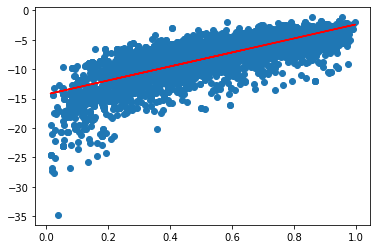

In [37]:
plt.scatter(energy,loudness)
plt.plot(energy, y_pred, color='red')
plt.show()

In [39]:
import numpy as np

In [51]:
def coef(m):
    z = m*test_df.energy + (1-m)*test_df.loudness
    return np.cov(z)


In [62]:
np.corrcoef(test_df.energy,test_df.loudness)

array([[1.        , 0.76499981],
       [0.76499981, 1.        ]])

### Mutinomial Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [11]:
# define the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_scaled,y_train)
# report the model performance
y_pred = model.predict(X_test_scaled)
print(f" Logistic regression model accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Logistic regression model accuracy: 0.737


## Decision Tree

In [12]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2"], columns=["Predicted 0", "Predicted 1","Predicted 2"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,61,42,63
Actual 1,44,761,82
Actual 2,72,80,128


Accuracy Score : 0.7126781695423856
Classification Report
              precision    recall  f1-score   support

           0       0.34      0.37      0.36       166
           1       0.86      0.86      0.86       887
           2       0.47      0.46      0.46       280

    accuracy                           0.71      1333
   macro avg       0.56      0.56      0.56      1333
weighted avg       0.71      0.71      0.71      1333



## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2"], columns=["Predicted 0", "Predicted 1","Predicted 2"])

cm_df

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1,Predicted 2
Actual 0,58,37,71
Actual 1,11,809,67
Actual 2,30,66,184


Accuracy Score : 0.7884471117779445
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.35      0.44       166
           1       0.89      0.91      0.90       887
           2       0.57      0.66      0.61       280

    accuracy                           0.79      1333
   macro avg       0.68      0.64      0.65      1333
weighted avg       0.78      0.79      0.78      1333



#### Neural Network Model

In [84]:
X = test_df.drop(labels=['Unnamed: 0','name','album','artist','release_date','mood','length','danceability.1','Moods','energy'],axis=1).values
y = test_df['mood'].values

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [85]:
import tensorflow as tf
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=3, activation="softmax"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 90)                900       
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1820      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 63        
Total params: 2,783
Trainable params: 2,783
Non-trainable params: 0
_________________________________________________________________


In [86]:
# Compile the model
nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [87]:
from tensorflow import keras 
y_int = y_train.astype(int)
y_train_cat = keras.utils.to_categorical(y_int)
y_test_cat = keras.utils.to_categorical(y_test.astype(int))

In [88]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train_cat,epochs=50)

Train on 3998 samples
Epoch 1/50
3998/3998 [==============================] - 1s 128us/sample - loss: 0.6998 - accuracy: 0.7021
Epoch 2/50
3998/3998 [==============================] - 0s 41us/sample - loss: 0.5755 - accuracy: 0.7571
Epoch 3/50
3998/3998 [==============================] - 0s 39us/sample - loss: 0.5651 - accuracy: 0.7561
Epoch 4/50
3998/3998 [==============================] - 0s 44us/sample - loss: 0.5553 - accuracy: 0.7606
Epoch 5/50
3998/3998 [==============================] - 0s 35us/sample - loss: 0.5509 - accuracy: 0.7589
Epoch 6/50
3998/3998 [==============================] - 0s 37us/sample - loss: 0.5470 - accuracy: 0.7601
Epoch 7/50
3998/3998 [==============================] - 0s 41us/sample - loss: 0.5449 - accuracy: 0.7666
Epoch 8/50
3998/3998 [==============================] - 0s 42us/sample - loss: 0.5398 - accuracy: 0.7659
Epoch 9/50
3998/3998 [==============================] - 0s 38us/sample - loss: 0.5382 - accuracy: 0.7714
Epoch 10/50
3998/3998 [=========

In [83]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test_cat,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1333/1 - 0s - loss: 0.6213 - accuracy: 0.7517
Loss: 0.5691133043592529, Accuracy: 0.7516879439353943
